In [6]:
import tweepy
from twitter_keys import consumer_key, consumer_secret, access_token, access_secret
import pickle

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

public_tweets = api.user_timeline('Android')

with open('android_tweets.pkl', 'wb') as f:
    pickle.dump(public_tweets, f)

In [7]:
import pickle
import tweepy
from twitter_keys import consumer_key, consumer_secret, access_token, access_secret
from nltk_helpers import get_sentiments

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

with open('android_tweets.pkl', 'rb') as f:
    public_tweets = pickle.load(f)
   # print( public_tweets)
android=[]
iphone=[]
for page in tweepy.Cursor(api.search, q='@Android', count=100, tweet_mode='extended').pages(4):
    for devices in page:
        if devices._json['source']=='<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
            iphone.append(get_sentiments(devices._json['full_text']))
            
        if devices._json['source']=='<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>':
            android.append(get_sentiments(devices._json['full_text']))
#for values in android:
   # print(values['neg'])
#for values in iphone:
  #  print(values['neg'])
    #print(page[1]. _json['full_text'])


In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
xs = []
for sent in iphone:
    xs.append(sent['neg'])

ys = [sent['neu']]


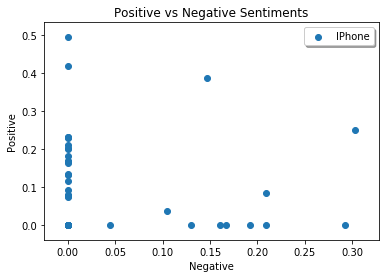

In [11]:
plt.scatter(xs, zs, label='IPhone')
#plt.scatter(arbyX, arbyZ,color='r', marker='s', label='Android')
plt.xlabel('Negative')
plt.ylabel('Positive')
plt.title('Positive vs Negative Sentiments')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [12]:


i=[]
a=[]
for values in iphone:
    i.append(values['neg'])
for values in iphone:
    a.append(values['pos'])
#print(a)
#print(i)
#plt.hist(list(i))
#plt.hist(list(a))

In [ ]:
#plt.loglog(a)

In [3]:
#plt.loglog(i)

In [4]:
#plt.hist(list(a))

In [14]:
#ca=[]
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
import matplotlib.style as style
#style.use('seaborn-poster')
#style.use('dark_background')
ci=[]
for values in iphone:
    ci.append(values['compound'])
#for values in android:
#    ca.append(values['compound'])
#plt.hist(list(ca))


Text(0.5, 0, 'Compound Values')

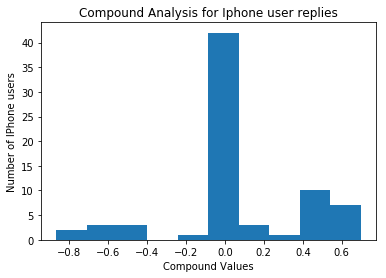

In [15]:
plt.hist(list(ci))
plt.title('Compound Analysis for Iphone user replies')
plt.ylabel('Number of IPhone users')
plt.xlabel('Compound Values')


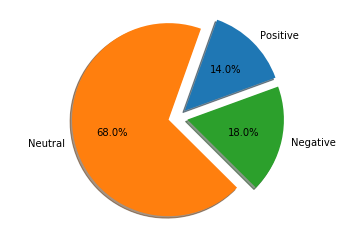

In [16]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive', 'Neutral','Negative'
sizes = [14,68,18]
explode = (0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=20)
ax1.axis('equal') 
plt.show()